In [1]:
import pandas as pd
import quandl
import pandas_datareader as web

In [2]:
start_date=pd.to_datetime('2012-11-01')
end_date=pd.to_datetime('2017-11-01')

In [3]:
aaple=pd.DataFrame(web.DataReader('AAPL','yahoo',start_date,end_date)['Adj Close'])
cisco=pd.DataFrame(web.DataReader('CSCO','yahoo',start_date,end_date)['Adj Close'])
ibm=pd.DataFrame(web.DataReader('IBM','yahoo',start_date,end_date)['Adj Close'])
amazon=pd.DataFrame(web.DataReader('AMZN','yahoo',start_date,end_date)['Adj Close'])


In [4]:
amazon.head()

,Adj Close
Date,
2012-10-31,232.889999
2012-11-01,232.139999
2012-11-02,232.419998
2012-11-05,234.330002
2012-11-06,237.559998


In [5]:
amazon.iloc[0]['Adj Close']

232.88999938964844

In [6]:
for stock_df in (aaple,cisco,ibm,amazon):
    stock_df['cum return']=stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [7]:
amazon.tail()

,Adj Close,cum return
Date,,
2017-10-26,972.429993,4.175491
2017-10-27,1100.949951,4.727339
2017-10-30,1110.849976,4.769848
2017-10-31,1105.280029,4.745932
2017-11-01,1103.680054,4.739062


In [8]:
#30% in Apple
#20% in Google/Alphabet
#40% in Amazon
#10% in IBM

In [9]:
aaple['Weighted_return']=0.30*aaple['cum return']*1000000
cisco['Weighted_return']=0.20*cisco['cum return']*1000000
ibm['Weighted_return']=0.40*ibm['cum return']*1000000
amazon['Weighted_return']=0.10*aaple['cum return']*1000000

amazon.head()


,Adj Close,cum return,Weighted_return
Date,,,
2012-10-31,232.889999,1.000000,100000.000000
2012-11-01,232.139999,0.996780,100204.934728
2012-11-02,232.419998,0.997982,96889.076239
2012-11-05,234.330002,1.006183,98202.658880
2012-11-06,237.559998,1.020052,97905.321197


In [10]:
portfolio=pd.concat([aaple['Weighted_return'],cisco['Weighted_return'],ibm['Weighted_return'],amazon['Weighted_return']],axis=1)

portfolio.columns=['Apple','Cisco','IBM','Amazon']

portfolio['Portfolio']=(portfolio['Apple']+ portfolio['Cisco']+portfolio['IBM']+portfolio['Amazon'])

portfolio.head()

,Apple,Cisco,IBM,Amazon,Portfolio
Date,,,,,
2012-10-31,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-11-01,300614.804185,204198.270183,405387.474612,100204.934728,1.010405e+06
2012-11-02,290667.228718,202332.391964,397738.199019,96889.076239,9.876269e+05
2012-11-05,294607.976639,202915.508367,399198.127557,98202.658880,9.949243e+05
2012-11-06,293715.963592,203848.388557,401110.342038,97905.321197,9.965800e+05


In [11]:
portfolio.tail()

,Apple,Cisco,IBM,Amazon,Portfolio
Date,,,,,
2017-10-26,614560.075881,469232.283588,365199.691948,204853.358627,1.653845e+06
2017-10-27,636579.692521,471423.135007,365389.822824,212193.230840,1.685586e+06
2017-10-30,650908.036921,466083.186923,367006.584970,216969.345640,1.700967e+06
2017-10-31,659965.756001,467589.270228,366293.304140,219988.585334,1.713837e+06
2017-11-01,651571.850407,474024.570372,366222.092075,217190.616802,1.709009e+06


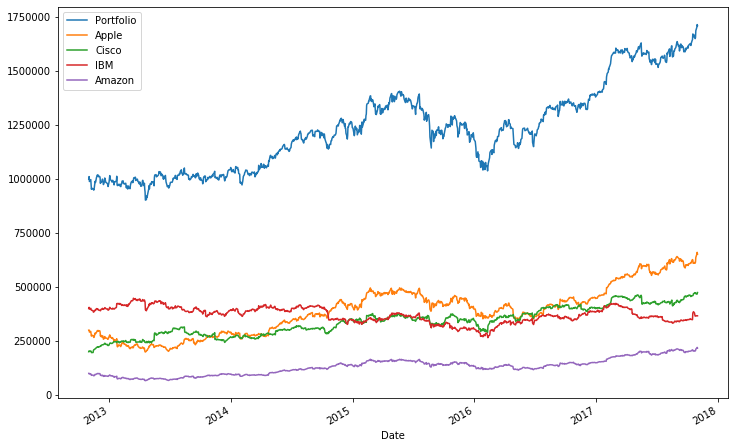

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

portfolio['Portfolio'].plot(figsize=(12,8))
portfolio['Apple'].plot(label='Apple')
portfolio['Cisco'].plot(label='Cisco')
portfolio['IBM'].plot(label='IBM')
portfolio['Amazon'].plot(label='Amazon')

plt.legend()

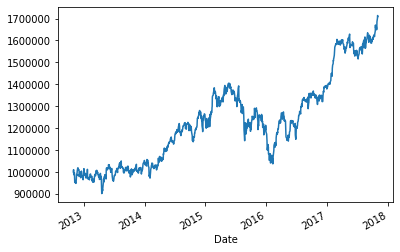

In [13]:
portfolio['Portfolio'].plot()

In [14]:
portfolio['Daily Return']=portfolio['Portfolio'].pct_change(1)
portfolio['cum returns']=(1+portfolio['Daily Return']).cumprod()

In [15]:
portfolio.tail()

,Apple,Cisco,IBM,Amazon,Portfolio,Daily Return,cum returns
Date,,,,,,,
2017-10-26,614560.075881,469232.283588,365199.691948,204853.358627,1.653845e+06,0.003052,1.653845
2017-10-27,636579.692521,471423.135007,365389.822824,212193.230840,1.685586e+06,0.019192,1.685586
2017-10-30,650908.036921,466083.186923,367006.584970,216969.345640,1.700967e+06,0.009125,1.700967
2017-10-31,659965.756001,467589.270228,366293.304140,219988.585334,1.713837e+06,0.007566,1.713837
2017-11-01,651571.850407,474024.570372,366222.092075,217190.616802,1.709009e+06,-0.002817,1.709009


In [16]:
annual_portfolio_risk=portfolio['Daily Return'].std()*(252**0.5)
annual_portfolio_avg_return=portfolio['Daily Return'].mean()*252

#Assuming risk-free rate = 0.01 or 1%

portfolio_sharpe_ratio= (annual_portfolio_avg_return-0.01)/annual_portfolio_risk

portfolio_sharpe_ratio

0.6809302323879184

In [17]:
total_return=((portfolio['Portfolio'][-1]/portfolio['Portfolio'][0])-1)*100

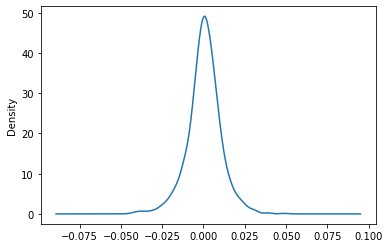

In [18]:
portfolio['Daily Return'].plot(kind='kde')

In [19]:
portfolio[['Apple','Cisco','IBM','Amazon']].pct_change(1).mean()

Apple     7.367575e-04
Cisco     7.713645e-04
IBM      -8.387071e-07
Amazon    7.367575e-04
dtype: float64

In [20]:
correlation_matrix=portfolio[['Apple','Cisco','IBM','Amazon']].pct_change(1).corr()

In [21]:
df=portfolio[['Apple','Cisco','IBM','Amazon']]

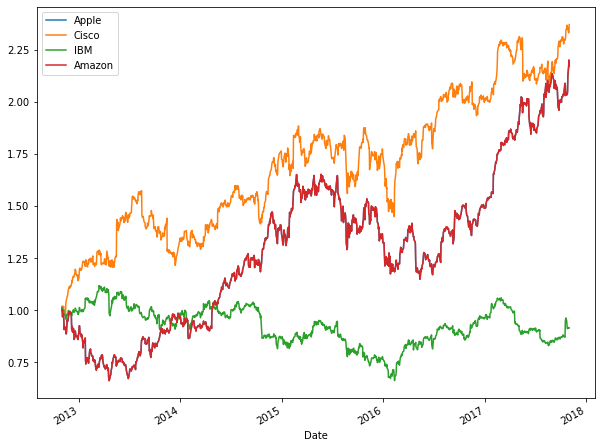

In [22]:
line_plot=df/df.iloc[0]
line_plot[['Apple','Cisco','IBM','Amazon']].plot(figsize=(10,8))

In [23]:
import numpy as np
log_df=np.log(df/df.shift(1))

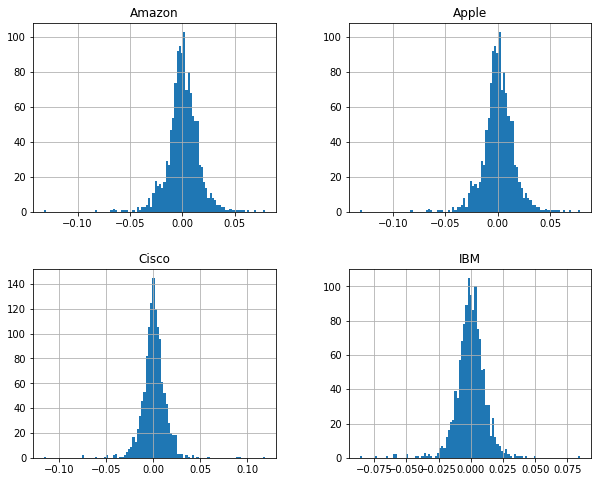

In [24]:
log_df.hist(bins=100,figsize=(10,8));

In [25]:
log_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Apple,1260.0,0.000616,0.015581,-0.131885,-0.006607,0.000515,0.008810,0.078795
Cisco,1260.0,0.000685,0.013132,-0.116066,-0.005357,0.000440,0.007270,0.118987
IBM,1260.0,-0.000070,0.011784,-0.086419,-0.005804,0.000000,0.006193,0.084934
Amazon,1260.0,0.000616,0.015581,-0.131885,-0.006607,0.000515,0.008810,0.078795


In [26]:
#mean log return
log_df.describe().transpose()['mean']*252

Apple     0.155121
Cisco     0.172588
IBM      -0.017645
Amazon    0.155121
Name: mean, dtype: float64

In [27]:
log_df.cov()*252

,Apple,Cisco,IBM,Amazon
Apple,0.061176,0.015722,0.012219,0.061176
Cisco,0.015722,0.043455,0.015407,0.015722
IBM,0.012219,0.015407,0.034995,0.012219
Amazon,0.061176,0.015722,0.012219,0.061176


In [28]:
weights=(np.random.random(4))

In [61]:
np.random.random(4)

array([0.18682099, 0.90503766, 0.26471598, 0.87739898])

In [29]:
weights=(weights/np.sum(weights))

In [30]:
exp_return=sum((log_df.mean()*weights)*252)

In [31]:
exp_vol=np.sqrt(np.dot(weights.T,np.dot(log_df.cov() * 252, weights)))

exp_vol

0.16659557984373158

In [32]:
SR=exp_return/exp_vol

In [33]:
SR

0.6619982063176965

In [34]:
for i in range(1):
    
    weights=np.random.random(4)
    
    
    weights=weights/np.sum(weights)
    
print(sum(weights))

1.0


In [35]:


num_ports=15000

weight_arr=np.zeros((15000,len(df.columns)))
return_arr=np.zeros(num_ports)
vol_arr=np.zeros(num_ports)
sharpe_arr=np.zeros(num_ports)

for i in range(num_ports):
    
    weights=np.random.random(4)
    
    weights=weights/np.sum(weights)
    
    weight_arr[i,:]=weights
    
    return_arr[i]=np.sum(log_df.mean()*weights*252)
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(log_df.cov() * 252, weights)))
    sharpe_arr[i]=return_arr[i]/vol_arr[i]
    
    
    

In [49]:
sharpe_arr.max()

0.915164986457447

In [72]:
np.sum(log_df.mean()*weights*252)
np.sqrt(np.dot(weights.T, np.dot(log_df.cov() * 252, weights)))

0.19026206391067196

In [76]:
np.dot(log_df.cov() * 252, weights)

array([0.04455371, 0.02325853, 0.01505408, 0.04455371])

In [80]:
np.dot(weights, np.dot(log_df.cov() * 252, weights))

0.03619965296354862

In [50]:
sharpe_arr.argmax()

9451

In [58]:
weight_arr[9451,:]

array([0.07208998, 0.65014322, 0.00244652, 0.27532028])

In [52]:
max_sr_ret=return_arr[9451]
max_sr_vol=vol_arr[9451]

In [55]:
sharpe_arr

array([0.6709452 , 0.56044849, 0.63636734, ..., 0.77345252, 0.55691464,
       0.76197485])

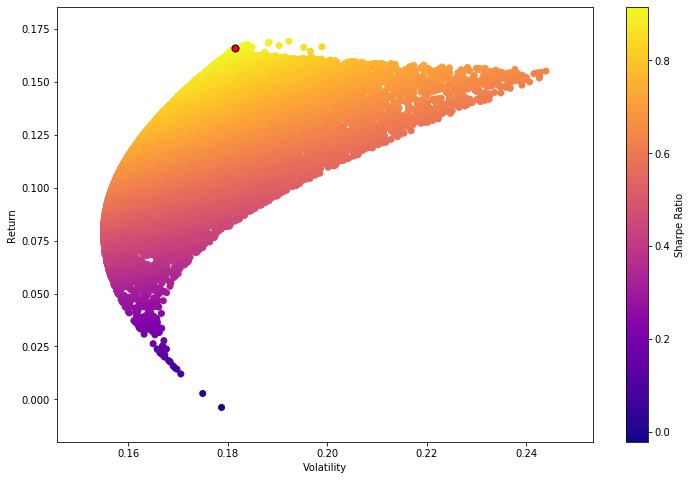

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,return_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [41]:
from datetime import datetime
df.head()

,Apple,Cisco,IBM,Amazon
Date,,,,
2012-10-31,300000.000000,200000.000000,400000.000000,100000.000000
2012-11-01,300614.804185,204198.270183,405387.474612,100204.934728
2012-11-02,290667.228718,202332.391964,397738.199019,96889.076239
2012-11-05,294607.976639,202915.508367,399198.127557,98202.658880
2012-11-06,293715.963592,203848.388557,401110.342038,97905.321197


In [42]:
datetime.strftime((df.reset_index()['Date'][0]),'%A')

'Wednesday'